In [1]:
from os.path import join

import numpy as np
from numpy.fft import fft2, fftshift, ifft2

from matplotlib.image import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 18

In [2]:
# Read image and convert RGB to grayscale
A =  imread(join('..', 'DATA', 'jelly.jpg')).mean(axis=-1)

# Compute FFT of image using fft2
At = fft2(A)

# Zero out small coefficients (keep top 5%)
threshold = np.percentile(abs(At), 95)
Atlow = At * (abs(At) > threshold)

# Reconstruct with inverse transform
Alow = ifft2(Atlow).real

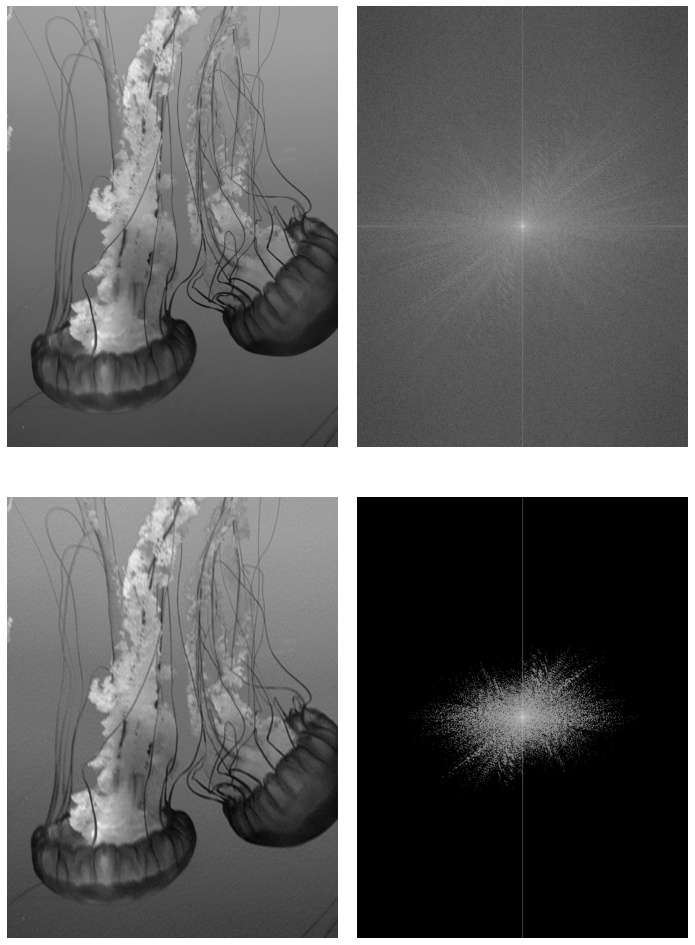

In [3]:
# Figure 3.1

# Centre FT and put on log scale for display
F = np.log(abs(fftshift(At)) + 1)
Flow = np.log(abs(fftshift(Atlow)) + 1)

fig, axs = plt.subplots(2, 2, figsize=(10, 14))
for ax, im in zip(axs.flat, [A, F, Alow, Flow]):
    ax.imshow(im, cmap='gray')
    ax.axis(False)
plt.tight_layout()

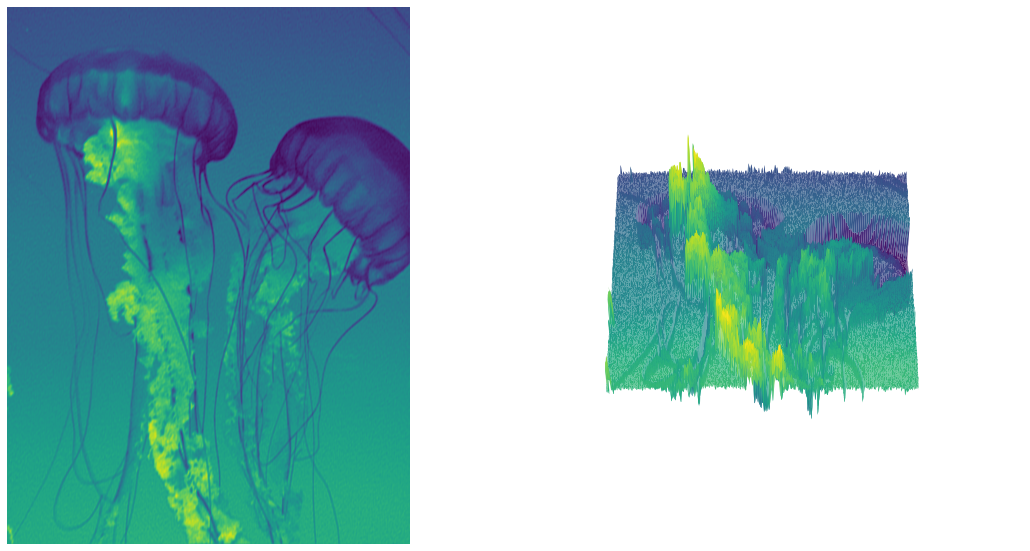

In [4]:
# Figure 3.2

A_rot = np.rot90(Alow, 2)
y, x = np.arange(A_rot.shape[0]), np.arange(A_rot.shape[1])
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(16, 8))
axs = [
    fig.add_subplot(1, 2, 1),
    fig.add_subplot(1, 2, 2, projection='3d'),
]

axs[0].imshow(np.flipud(Alow), cmap='viridis')
axs[0].axis(False)

axs[1].plot_surface(
    X, Y, A_rot, rstride=5, cstride=5,
    antialiased=True, cmap='viridis',
)
axs[1].view_init(60, 90) 
axs[1].axis(False)

plt.tight_layout();